# Upload Files

In [26]:
# from google.colab import files
# files.upload()

In [27]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download -d yamqwe/depression-anxiety-stress-scales --unzip

# Data

## Import Libraries

In [76]:
import pandas as pd
import numpy as np
import re
import warnings
import csv
import os
import time
import datetime
warnings.filterwarnings("ignore")

Import library yang diperlukan

In [77]:
data_raw = pd.read_csv("./data.csv", sep=r'\t')
data_raw.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


## About Data

This data was collected with an on-line version of the Depression Anxiety Stress Scales (DASS), see http://www2.psy.unsw.edu.au/dass/
<br>
The survey was open to anyone and people were motivated to take it to get personalized results. At the end of the test they also were given the option to complete a short research survey. This datatset comes from those who agreed to complete the research survey and answered yes to the question "Have you given accurate answers and may they be used for research?" at the end.
<br>
This data was collected 2017 - 2019.
<br>
The following items were included in the survey:
<br>
Q1	I found myself getting upset by quite trivial things.
<br>
Q2	I was aware of dryness of my mouth.
<br>
Q3	I couldn't seem to experience any positive feeling at all.
<br>
Q4	I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion).
<br>
Q5	I just couldn&#39;t seem to get going.
<br>
Q6	I tended to over-react to situations.
<br>
Q7	I had a feeling of shakiness (eg, legs going to give way).
<br>
Q8	I found it difficult to relax.
<br>
Q9	I found myself in situations that made me so anxious I was most relieved when they ended.
<br>
Q10	I felt that I had nothing to look forward to.
<br>
Q11	I found myself getting upset rather easily.
<br>
Q12	I felt that I was using a lot of nervous energy.
<br>
Q13	I felt sad and depressed.
<br>
Q14	I found myself getting impatient when I was delayed in any way (eg, elevators, traffic lights, being kept waiting).
<br>
Q15	I had a feeling of faintness.
<br>
Q16	I felt that I had lost interest in just about everything.
<br>
Q17	I felt I wasn&#39;t worth much as a person.
<br>
Q18	I felt that I was rather touchy.
<br>
Q19	I perspired noticeably (eg, hands sweaty) in the absence of high temperatures or physical exertion.
<br>
Q20	I felt scared without any good reason.
<br>
Q21	I felt that life wasn&#39;t worthwhile.
<br>
Q22	I found it hard to wind down.
<br>
Q23	I had difficulty in swallowing.
<br>
Q24	I couldn&#39;t seem to get any enjoyment out of the things I did.
<br>
Q25	I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, 
heart missing a beat).
<br>
Q26	I felt down-hearted and blue.
<br>
Q27	I found that I was very irritable.
<br>
Q28	I felt I was close to panic.
<br>
Q29	I found it hard to calm down after something upset me.
<br>
Q30	I feared that I would be &quot;thrown&quot; by some trivial but unfamiliar task.
<br>
Q31	I was unable to become enthusiastic about anything.
<br>
Q32	I found it difficult to tolerate interruptions to what I was doing.
<br>
Q33	I was in a state of nervous tension.
<br>
Q34	I felt I was pretty worthless.
<br>
Q35	I was intolerant of anything that kept me from getting on with what I was doing.
<br>
Q36	I felt terrified.
<br>
Q37	I could see nothing in the future to be hopeful about.
<br>
Q38	I felt that life was meaningless.
<br>
Q39	I found myself getting agitated.
<br>
Q40	I was worried about situations in which I might panic and make a fool of myself.
<br>
Q41	I experienced trembling (eg, in the hands).
<br>
Q42	I found it difficult to work up the initiative to do things.
<br>
<br>
Each item was presented one at a time in a random order for each new participant along with a 4 point rating scale asking the user to indicate how often that had been true of them in the past week where
<br>
1 = Did not apply to me at all 
<br>
2 = Applied to me to some degree, or some of the time
<br>
3 = Applied to me to a considerable degree, or a good part of the time
<br>
4 = Applied to me very much, or most of the time
<br>
<br>
(see the file demo1.png for how this looked)
<br>
<br>
This response is stored in variable A (e.g. Q1A). Also recorded was the time taken in milliseconds to answer that question (E) and that question's position in the survey (I).
<br>
<br>
These other durations were also recorded (measured on the server's side):
<br>
<br>
introelapse		The time spent on the introduction/landing page (in seconds)
<br>
testelapse		The time spent on all the DASS questions (should be equivalent to the time elapsed on all the 
indiviudal questions combined)
<br>
surveyelapse	The time spent answering the rest of the demographic and survey questions
<br>
<br>
On the next page was a generic demographics survey with many different questions.
<br>
<br>
The Ten Item Personality Inventory was administered (see Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.):
<br>
<br>
TIPI1	Extraverted, enthusiastic.
<br>
TIPI2	Critical, quarrelsome.
<br>
TIPI3	Dependable, self-disciplined.
<br>
TIPI4	Anxious, easily upset.
<br>
TIPI5	Open to new experiences, complex.
<br>
TIPI6	Reserved, quiet.
<br>
TIPI7	Sympathetic, warm.
<br>
TIPI8	Disorganized, careless.
<br>
TIPI9	Calm, emotionally stable.
<br>
TIPI10	Conventional, uncreative.
<br>
<br>
The TIPI items were rated "I see myself as:" _____ such that
<br>
<br>
1 = Disagree strongly
<br>
2 = Disagree moderately
<br>
3 = Disagree a little
<br>
4 = Neither agree nor disagree
<br>
5 = Agree a little
<br>
6 = Agree moderately
<br>
7 = Agree strongly
<br>
<br>


The following items were presented as a check-list and subjects were instructed "In the grid below, check all the words whose definitions you are sure you know":

VCL1	boat<br>
VCL2	incoherent<br>
VCL3	pallid<br>
VCL4	robot<br>
VCL5	audible<br>
VCL6	cuivocal<br>
VCL7	paucity<br>
VCL8	epistemology<br>
VCL9	florted<br>
VCL10	decide<br>
VCL11	pastiche<br>
VCL12	verdid<br>
VCL13	abysmal<br>
VCL14	lucid<br>
VCL15	betray<br>
VCL16	funny<br>

A value of 1 is checked, 0 means unchecked. The words at VCL6, VCL9, and VCL12 are not real words and can be used as a validity check.

A bunch more questions were then asked:


education			"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree<br><br>
urban				"What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)<br><br>
gender				"What is your gender?", 1=Male, 2=Female, 3=Other<br><br>
engnat				"Is English your native language?", 1=Yes, 2=No<br><br>
age					"How many years old are you?"<br><br>
hand				"What hand do you use to write with?", 1=Right, 2=Left, 3=Both<br><br>
religion			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other<br><br>
orientation			"What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other<br><br>
race				"What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other<br><br>
voted				"Have you voted in a national election in the past year?", 1=Yes, 2=No<br><br>
married				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married<br><br>
familysize			"Including you, how many children did your mother have?"<br><br>
major				"If you attended a university, what was your major (e.g. "psychology", "English", "civil engineering")?"<br><br>

The following values were derived from technical information:

country				ISO country code of where the user connected from<br><br>
screensize			1=device with small screen (phone, etc), 2=device with big screen (laptop, desktop, etc)<br><br>
uniquenetworklocation		1=only one survey from user's specific network in dataset, 2=multiple surveys submitted from the network of this user  (2 does not necessarily imply duplicate records for an individual, as it could be different students at a single school or different memebers of the same household; and even if 1 there still could be duplicate records from a single individual e.g. if they took it once on their wifi and once on their phone)<br><br>
source			how the user found the test, 1=from the front page of the site hosting the survey, 2=from google, 0=other or unknown



In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = sns.color_palette("bright", 8)
explode = (0, 0.1)

#autopct_generator
def autopct_generator(limit=5):
    def inner_autopct(pct):
        return ('%.0f%%' % pct) if pct > limit else ''
    return inner_autopct

#function to plot percentage by column
def plot_percentage_by_column(data, column, target='target', 
                              explode=None, title=None, 
                              loc_legend="upper right", startangle=90, 
                              shadow=True,figsize=[12, 5],
                              legend_labels=None,
                              legend=True,
                              autopct=autopct_generator(5),
                               **kwargs):
  if legend_labels:
    gonna_plot = data[column].value_counts()[legend_labels]
  else:
    gonna_plot = data[column].value_counts()
  plt.figure(figsize=figsize)
  plt.pie(gonna_plot, 
        colors=colors,
        explode=explode,
        startangle=startangle,
        shadow=shadow,
        wedgeprops={'edgecolor': 'black'}, 
        autopct=autopct,
        )
  if title:
    plt.title(title, fontsize="x-large", fontweight="bold")
  if legend:
    plt.legend(labels=gonna_plot.keys(), loc=loc_legend)
  plt.show()

#function to print unique value and na values
jumlah_seluruh_data = data_raw.shape[0]
def unique_and_na(data):
  assert type(data) == pd.Series
  print(f"Jumlah data unik → {len(data.unique())}")
  print(f"Jumlah data NaN → {data.isna().sum()}")
  print(f"Persentase data NaN → {data.isna().sum() / jumlah_seluruh_data * 100}")

#function to plot percentage by category
def plot_percentage_by_category(data, category, target='target', 
                                explode=None, title=None, 
                                loc_legend="upper right", 
                                y_title=1, startangle=90,
                                figsize=[12, 5], 
                                legend_labels = None,
                                autopct=autopct_generator(5),
                                shadow=True, **kwargs):
  percentage = data[[category, target]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

  if legend_labels:
    list_temp = legend_labels
  else:
   list_temp = data[category].dropna().unique()

  fig, ax = plt.subplots(nrows=1, ncols=len(list_temp), figsize=figsize)
  for index, element in enumerate(list_temp):
    labels = percentage.loc[element].keys()
    ax[index].pie(percentage.loc[element],
                startangle=startangle, 
                colors=colors, 
                autopct=autopct_generator(),
                shadow=shadow,
                explode=explode,
                wedgeprops={'edgecolor': 'black'}, **kwargs)
    ax[index].set_title(f"Persentase {element}", fontweight="bold")
  
  if title:
    fig.suptitle(title, 
                fontsize=20, 
                fontweight='bold', y=y_title)
  fig.legend(loc=loc_legend, labels=labels)
  plt.show()

# function for countplot
def plot_countplot(data, x, hue='target', title=None, xlabel=False, **kwargs):
  plt.figure(figsize=(12, 5))
  ax = sns.countplot(data=data, x=x, hue=hue, palette=colors, **kwargs)

  if title:
    ax.set(title=title)

  if xlabel is not False:
    ax.set(xlabel=xlabel)
  plt.legend(fontsize="x-large")

## Continue Analyzing Data

In [79]:
list_A_names = [f"Q{x}A" for x in range(1, 43)]
list_I_names = [f"Q{x}I" for x in range(1, 43)]
list_E_names = [f"Q{x}E" for x in range(1, 43)]
list_VCL = [f"VCL{x}" for x in range(1, 17)]
list_TIPI = [f"TIPI{x}" for x in range(1, 11)]

Disini kami pisahkan nama-nama kolom berdasarkan tipenya.
<br>
list_A_names → Kolom pertanyaan dengan kode A
<br>
list_I_names → Kolom pertanyaan dengan kode I
<br>
list_E_names → Kolom pertanyaan dengan kode E

In [80]:
data = data_raw.copy()
data.drop(list_I_names, axis=1, inplace=True)

Selanjutnya kami copy data sehingga ketika ada kesalahan kami mudah untuk kembali ke data awal. Kemudian kami membuang kolom list_I_names yang hanya berisikan urutan nomor pertanyaan tersebut.

In [81]:
list_other = list(set(data.columns) - set(list_I_names) \
    - set(list_A_names) - set(list_E_names) - set(list_VCL) \
    - set(list_TIPI))

Disini kami membuat List untuk kolom lain selain kolom Question, TIPI, dan VCL (ex : Gender, Race dsb)

In [82]:
#VCL6, VCL9, VCL12 bukan kata yang benar2 ada yang hanya digunakan sebagai validasi, sehingga nilai di balik
data["VCL9"] = data["VCL9"].apply(lambda x: 1 if x==0 else 0)
data["VCL6"] = data["VCL6"].apply(lambda x: 1 if x==0 else 0)
data["VCL12"] = data["VCL12"].apply(lambda x: 1 if x==0 else 0)

Disini kami merubah nilai dari VCL9, VCL6, dan VCL 12 dari yang 1 menjadi 0 dan sebaliknya. Hal ini dikarenakan pertanyaan tersebut merupakan pertanyaan jebakan yang sebenarnya kata-kata dari pertanyaan tersebut tidak ada. Sehingga apabila orang menjawab bahwa mereka tau kata tersebut, maka mereka justru salah. Dan sebaliknya

In [83]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

#Skala tingkat depression, anxiety, & stress
DASS_bins = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}

Disini kami menginisialisasi untuk pertanyaaan mana saja yang mengukur tingkat depresi, kecemasan dan Stress. Kemudian kami juga menginisialisasi untuk skala dari tiap-tiap penyakit mental tersebut apakah seseorang tersebut mengalami penyakit mental Normal, Mild, Severe atau Extremely Severe

In [84]:
dep = []
for i in DASS_keys["Depression"]:
    dep.append(f"Q{i}A")
    dep.append(f"Q{i}E")
stress = []
for i in DASS_keys["Stress"]:
    stress.append(f"Q{i}A")
    stress.append(f"Q{i}E")
anx = []
for i in DASS_keys["Anxiety"]:
    anx.append(f"Q{i}A")
    anx.append(f"Q{i}E")

Disini kami membuat list yang mengumpulkan kolom-kolom dari tiap penyakit mental tersebut pada list diatas

In [85]:
only_q = data[list_A_names + list_E_names]
only_q.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33E,Q34E,Q35E,Q36E,Q37E,Q38E,Q39E,Q40E,Q41E,Q42E
0,4,4,2,4,4,4,4,4,2,1,...,3316,3563,5594,1477,3885,5265,1892,4228,1574,2969
1,4,1,2,3,4,4,3,4,3,2,...,2505,2540,4359,3925,4609,3755,2323,5713,1334,5562
2,3,1,4,1,4,3,1,3,2,4,...,3824,2141,17461,1557,4446,1883,5790,4432,2203,5768
3,2,3,2,1,3,3,4,2,3,3,...,2977,5620,16760,6427,3760,4112,2769,4432,3643,3698
4,2,2,3,4,4,2,4,4,4,3,...,1868,2536,3725,2130,3952,10694,3231,3604,1950,6265


Disini kami membuat DataFrame only_q yang berisikan kolom kolom q saja

In [86]:
depression_q = only_q[dep]
stress_q = only_q[stress]
anxiety_q = only_q[anx]

Disini kami memisahkan untuk data depresi, stress, dan kecemasan sesuai dengan pertanyaan pada DASS

In [87]:
import re
def scores(df):
    r = re.compile(".*A")
    col = list(filter(r.match, df.columns))
    df[col] = df[col].subtract(1, axis=1)
    df["Scores"] = df[col].sum(axis=1)
    return df

Disini kami membuat fungsi score yang menjumlahkan nilai dari jawaban yang peserta pilih

In [88]:
train_dep = scores(depression_q)
train_str = scores(stress_q)
train_anx = scores(anxiety_q)

Disini kami menjalankan fungsi Score pada tiap-tiap penyakit mental

In [89]:
train_dep

,Q3A,Q3E,Q5A,Q5E,Q10A,Q10E,Q13A,Q13E,Q16A,Q16E,...,Q31E,Q34A,Q34E,Q37A,Q37E,Q38A,Q38E,Q42A,Q42E,Scores
0,1,1944,3,2153,0,4441,3,1416,3,2480,...,5560,2,3563,0,3885,1,5265,3,2969,27
1,1,4777,3,5078,1,1537,3,2004,2,4058,...,3307,1,2540,3,4609,1,3755,1,5562,24
2,3,3242,3,3927,3,3722,3,2489,3,3627,...,8273,3,2141,3,4446,3,1883,3,5768,39
3,1,5521,2,3269,2,4179,0,2560,1,3336,...,5378,3,5620,1,3760,0,4112,1,3698,16
4,2,4156,3,5628,2,3524,3,1314,2,2623,...,3012,3,2536,2,3952,2,10694,2,6265,32
5,1,12542,2,6428,1,6175,0,5290,3,8513,...,5615,0,3070,1,17227,1,7844,1,10310,13
6,1,3604,3,2842,3,3312,1,2883,3,17311,...,5133,2,7122,3,3951,3,2272,2,84607,31
7,0,5823,2,7635,0,3605,0,1422,0,7770,...,5667,0,1405,0,5432,0,2897,1,8665,4
8,2,11043,2,5847,2,2539,3,1233,3,2784,...,3801,3,1567,3,3868,2,3682,3,3662,35
9,3,2015,3,1712,3,1888,3,1298,3,1864,...,2094,3,1813,3,1830,3,1337,3,1891,42


In [90]:
def append(df, string):
    conditions = [
    ((df['Scores'] >= DASS_bins[string][0][0])  & (df['Scores'] < DASS_bins[string][0][1])),
    ((df['Scores'] >= DASS_bins[string][1][0])  & (df['Scores'] < DASS_bins[string][1][1])),
    ((df['Scores'] >= DASS_bins[string][2][0])  & (df['Scores'] < DASS_bins[string][2][1])),
    ((df['Scores'] >= DASS_bins[string][3][0])  & (df['Scores'] < DASS_bins[string][3][1])),
    (((df['Scores'] >= DASS_bins[string][3][1])))
    ]
    values = ['Normal','Mild', 'Moderate', 'Severe', 'Extremely Severe']
    df['Category'] = np.select(conditions, values)
    return df


train_dep = append(train_dep, 'Depression')
train_str = append(train_str, "Stress")
train_anx = append(train_anx, "Anxiety")
train_dep.head()

,Q3A,Q3E,Q5A,Q5E,Q10A,Q10E,Q13A,Q13E,Q16A,Q16E,...,Q34A,Q34E,Q37A,Q37E,Q38A,Q38E,Q42A,Q42E,Scores,Category
0,1,1944,3,2153,0,4441,3,1416,3,2480,...,2,3563,0,3885,1,5265,3,2969,27,Severe
1,1,4777,3,5078,1,1537,3,2004,2,4058,...,1,2540,3,4609,1,3755,1,5562,24,Severe
2,3,3242,3,3927,3,3722,3,2489,3,3627,...,3,2141,3,4446,3,1883,3,5768,39,Extremely Severe
3,1,5521,2,3269,2,4179,0,2560,1,3336,...,3,5620,1,3760,0,4112,1,3698,16,Moderate
4,2,4156,3,5628,2,3524,3,1314,2,2623,...,3,2536,2,3952,2,10694,2,6265,32,Extremely Severe


Disini kami membuat kolom baru sesuai dengan tingkat kronis dari tiap-tiap orang tersebut

In [91]:
train_dep["Category"] = train_dep["Category"].apply(lambda x: f"Depression {x}")
train_anx["Category"] = train_anx["Category"].apply(lambda x: f"Anxious {x}")
train_str["Category"] = train_str["Category"].apply(lambda x: f"Stress {x}")

In [44]:
def filter_time(df, threshold=2000):
  r = re.compile(".*E")
  cols = list(filter(r.match, df.columns))
  for col in cols:
    df.drop(df.loc[df[col] < threshold].index, inplace=True)
  return df

In [48]:
train_dep = filter_time(train_dep)
train_anx = filter_time(train_anx)
train_str = filter_time(train_str)

In [92]:
r = re.compile(".*A")
dep_A =  list(filter(r.match, dep))
stress_A = list(filter(r.match, stress))
anx_A = list(filter(r.match, anx))

In [93]:
train_dep = train_dep[dep_A + ["Category"]]
train_str = train_str[stress_A + ["Category"]]
train_anx = train_anx[anx_A + ["Category"]]

In [52]:
train_dep

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Category
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,Depression Moderate
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,Depression Mild
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,Depression Extremely Severe
19,1,3,1,2,1,1,2,2,2,1,1,2,1,3,Depression Severe
23,1,0,1,2,1,1,1,1,2,2,2,1,0,3,Depression Moderate
35,0,1,0,1,2,0,1,1,2,0,1,1,2,2,Depression Moderate
37,1,1,1,1,0,3,2,1,1,1,1,2,1,2,Depression Moderate
40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Depression Normal
44,0,2,1,1,1,0,1,1,1,3,0,0,1,0,Depression Mild
57,1,1,2,1,1,1,0,1,0,1,0,1,0,3,Depression Mild


In [97]:
train_dep.rename(columns={"Category" : "Depression Category"}, inplace=True)
train_str.rename(columns={"Category" : "Stress Category"}, inplace=True)
train_anx.rename(columns={"Category" : "Anxious Category"}, inplace=True)

In [99]:
all_data = pd.concat([data, train_anx["Anxious Category"], train_dep["Depression Category"], train_str["Stress Category"]], axis=1)

In [95]:
all_data.head()

,Q1A,Q1E,Q2A,Q2E,Q3A,Q3E,Q4A,Q4E,Q5A,Q5E,...,religion,orientation,race,voted,married,familysize,major,Category,Category,Category
0,4,3890,4,2122,2,1944,4,2044,4,2153,...,12,1,10,2,1,2,None,Anxious Extremely Severe,Depression Severe,Stress Extremely Severe
1,4,8118,1,2890,2,4777,3,3090,4,5078,...,7,0,70,2,1,4,None,Anxious Severe,Depression Severe,Stress Severe
2,3,5784,1,4373,4,3242,1,6470,4,3927,...,4,3,60,1,1,3,None,Anxious Moderate,Depression Extremely Severe,Stress Mild
3,2,5081,3,6837,2,5521,1,4556,3,3269,...,4,5,70,2,1,5,biology,Anxious Severe,Depression Moderate,Stress Mild
4,2,3215,2,7731,3,4156,4,2802,4,5628,...,10,1,10,2,1,4,Psychology,Anxious Extremely Severe,Depression Extremely Severe,Stress Severe


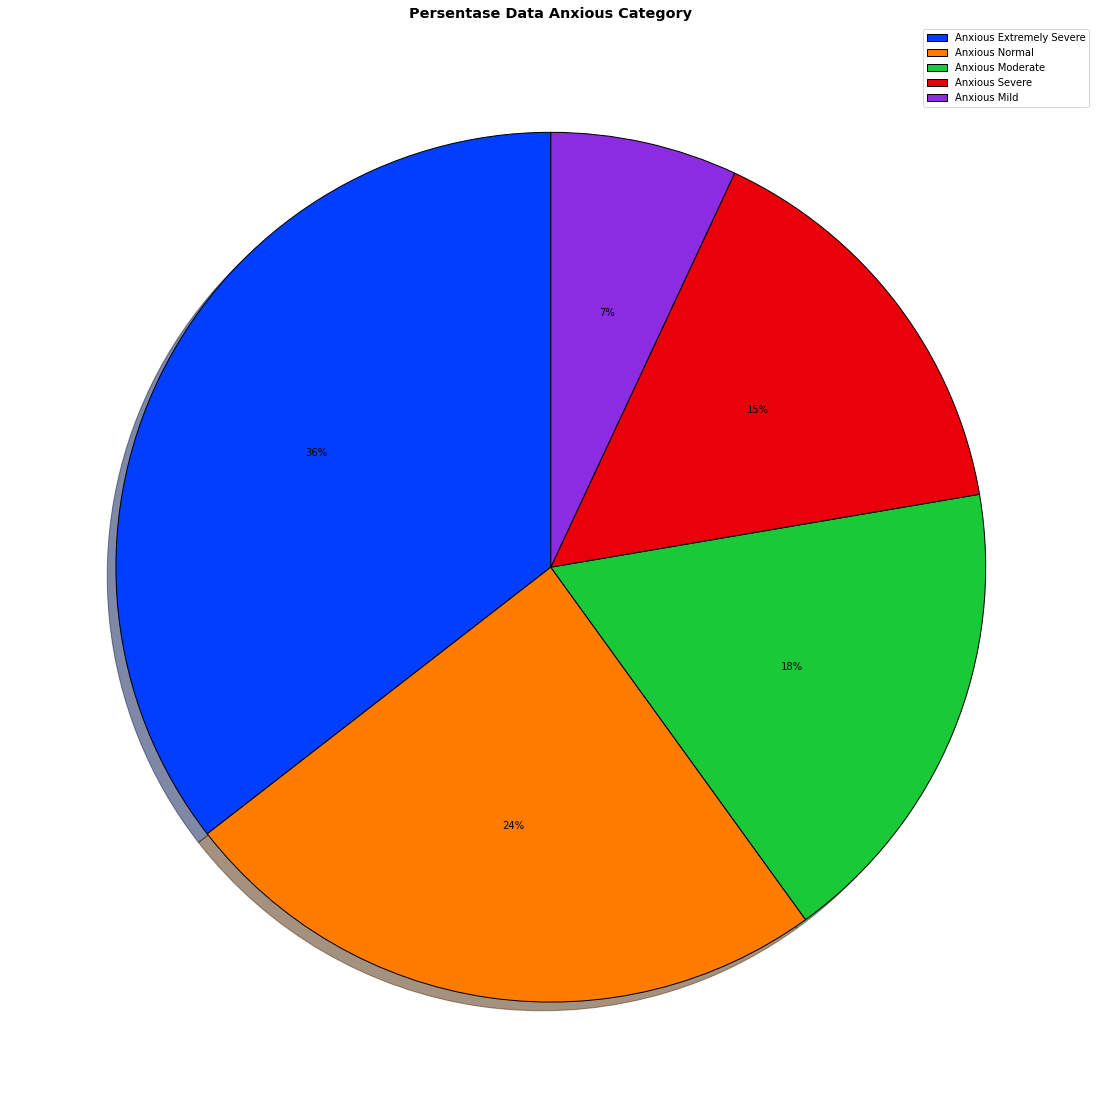

In [105]:
plot_percentage_by_column(all_data, "Anxious Category", title="Persentase Data Anxious Category", figsize=[20, 20])

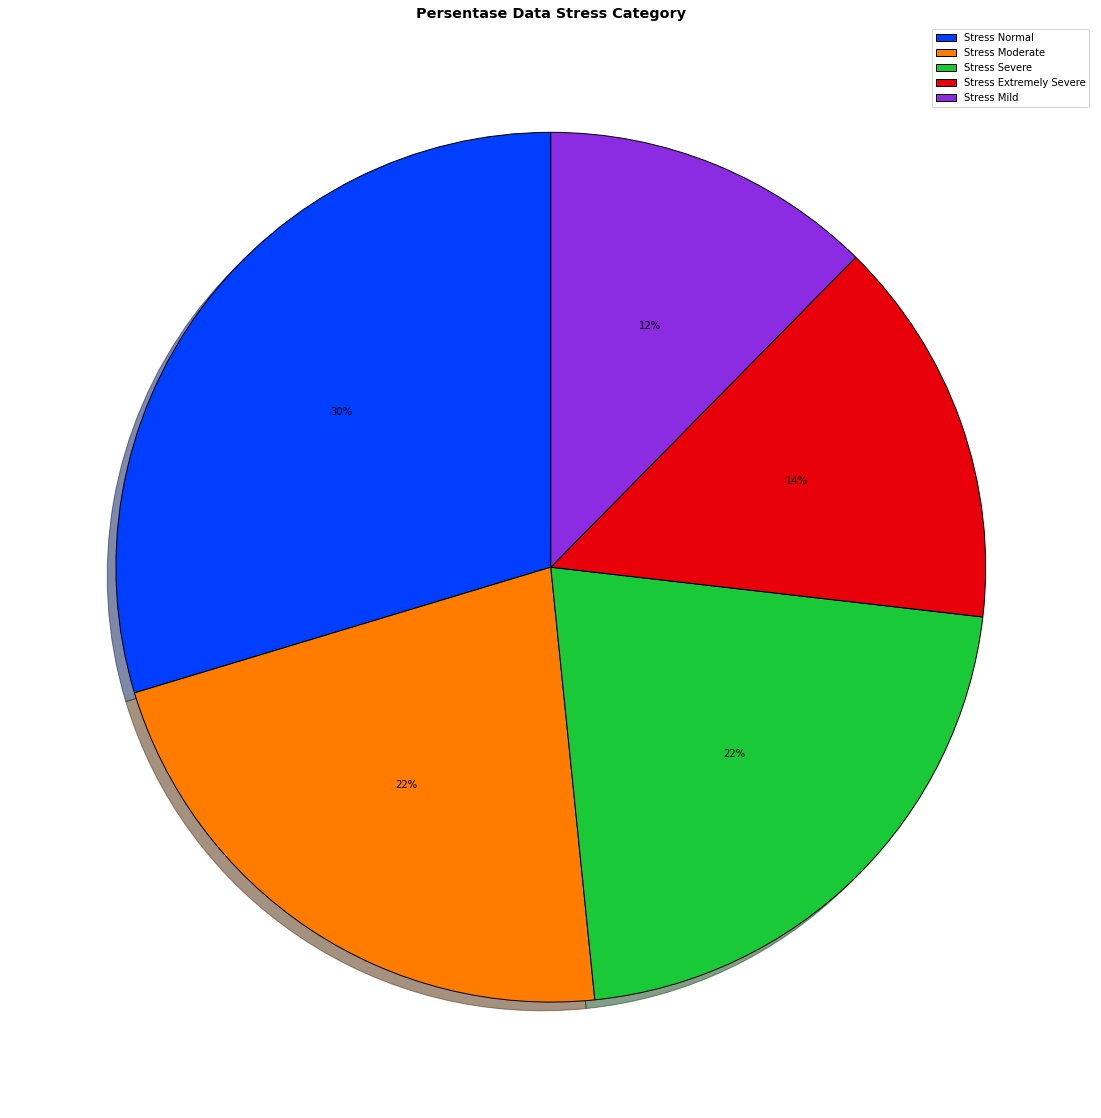

In [106]:
plot_percentage_by_column(all_data, "Stress Category", title="Persentase Data Stress Category", figsize=[20, 20])

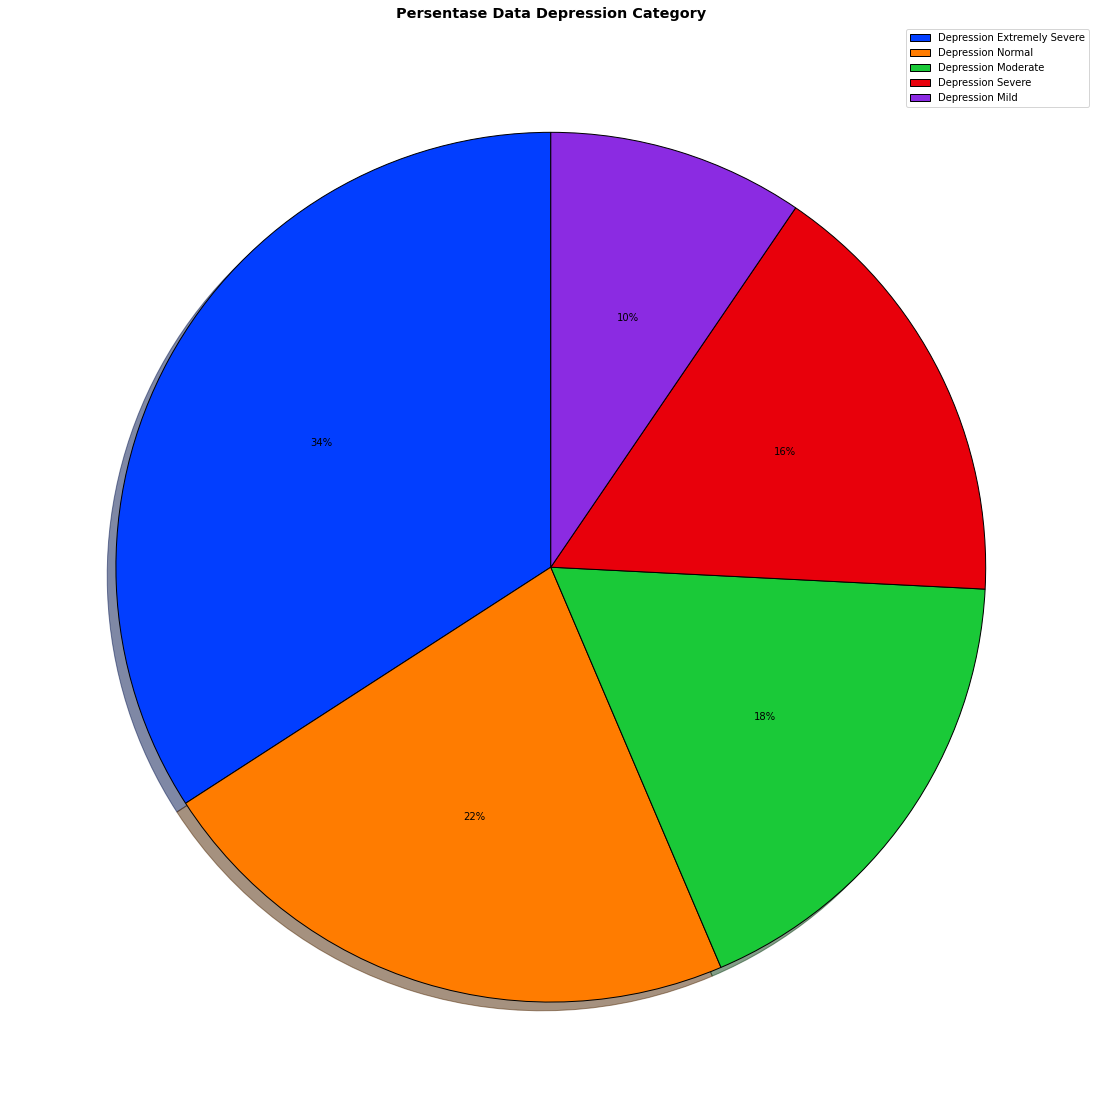

In [107]:
plot_percentage_by_column(all_data, "Depression Category", title="Persentase Data Depression Category", figsize=[20, 20])

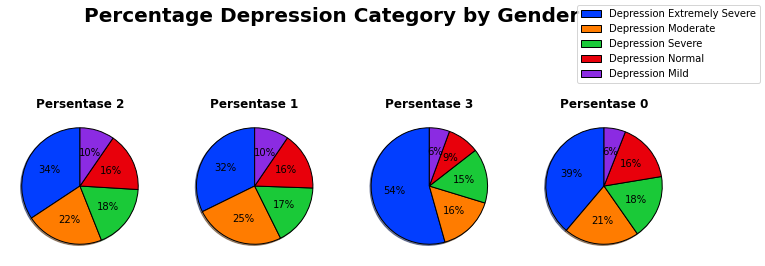

In [117]:
plot_percentage_by_category(all_data, "gender", "Depression Category", title="Percentage Depression Category by Gender")

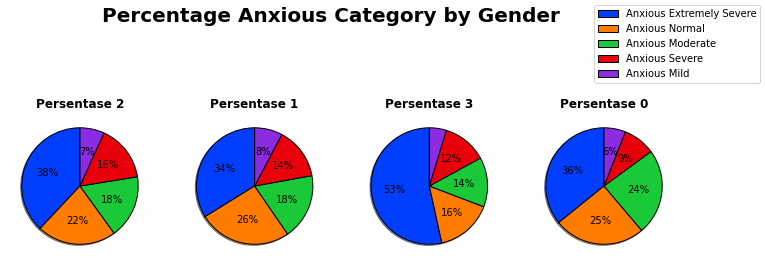

In [118]:
plot_percentage_by_category(all_data, "gender", "Anxious Category", title="Percentage Anxious Category by Gender")

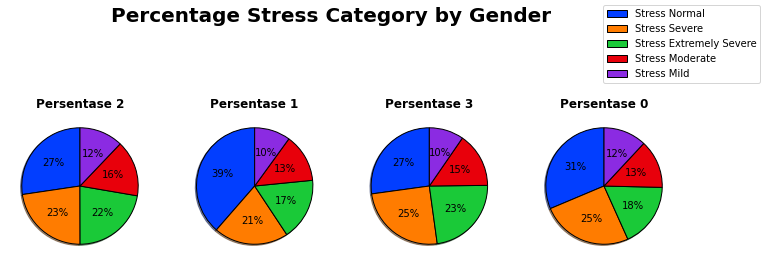

In [119]:
plot_percentage_by_category(all_data, "gender", "Stress Category", title="Percentage Stress Category by Gender")

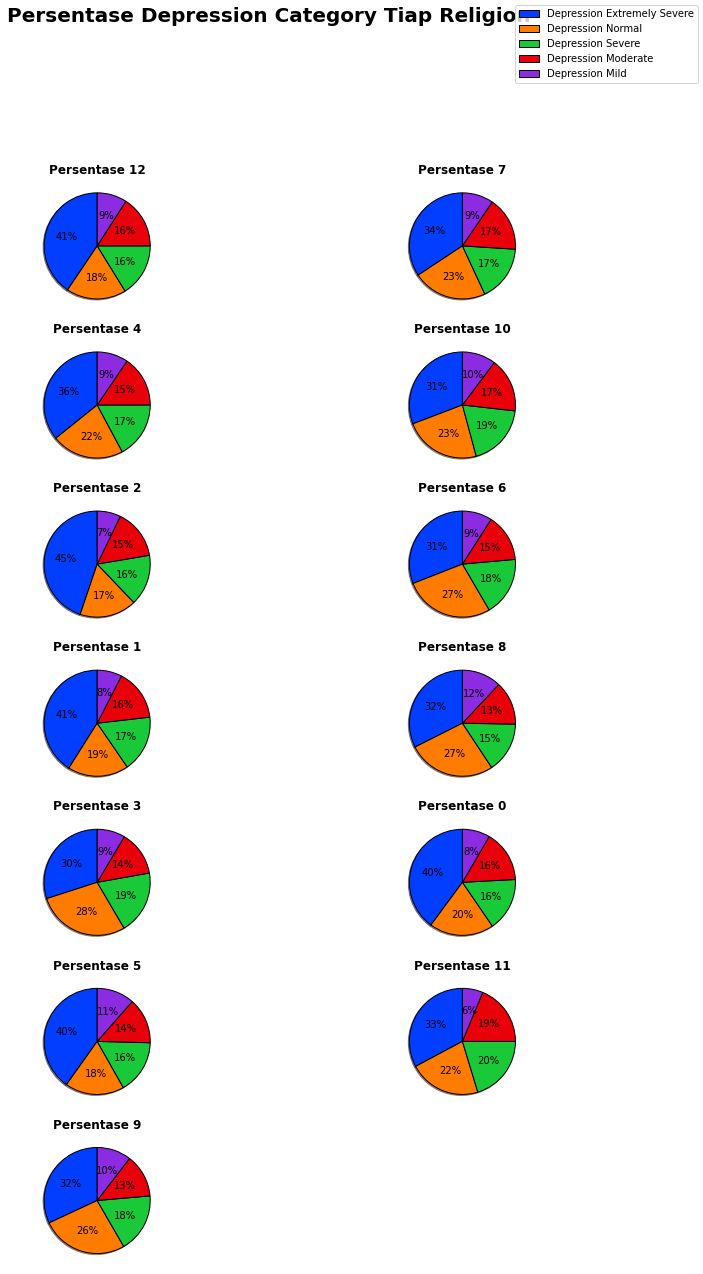

In [133]:
percentage = all_data[['religion', 'Depression Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['religion'].dropna().unique()

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[6, 1].set_visible(False)
fig.suptitle("Persentase Depression Category Tiap Religion", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

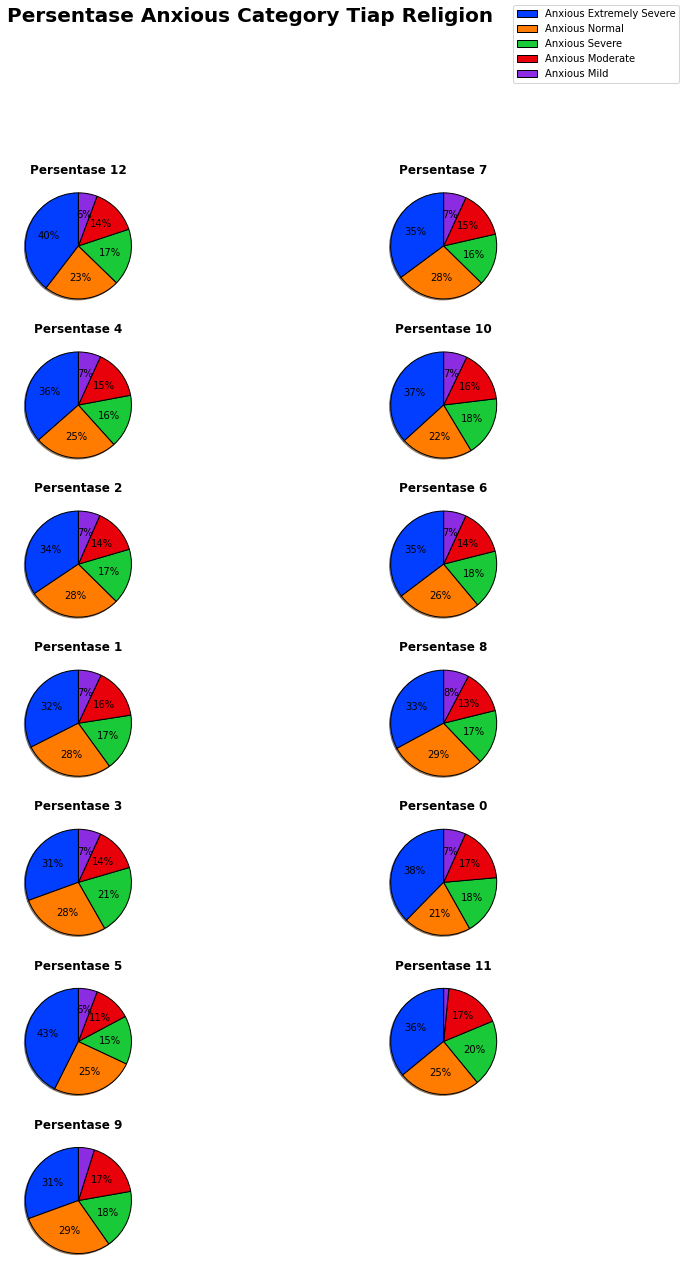

In [134]:
percentage = all_data[['religion', 'Anxious Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['religion'].dropna().unique()

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[6, 1].set_visible(False)
fig.suptitle("Persentase Anxious Category Tiap Religion", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

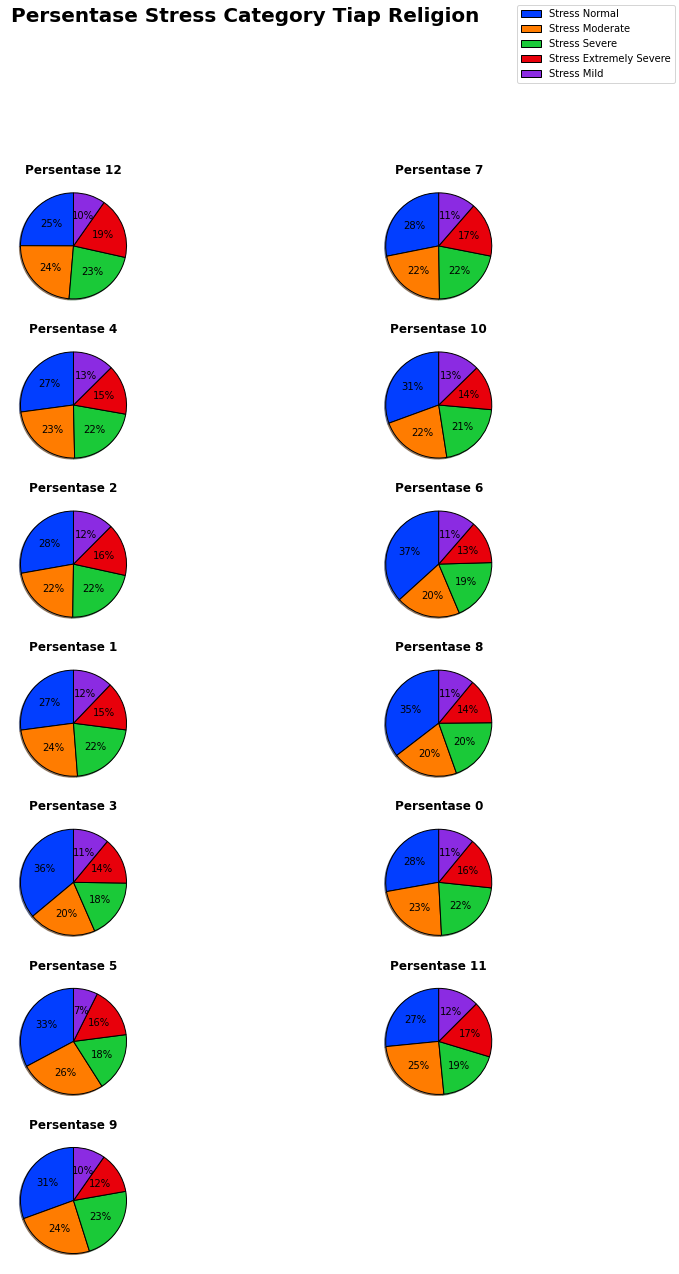

In [135]:
percentage = all_data[['religion', 'Stress Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['religion'].dropna().unique()

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[6, 1].set_visible(False)
fig.suptitle("Persentase Stress Category Tiap Religion", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

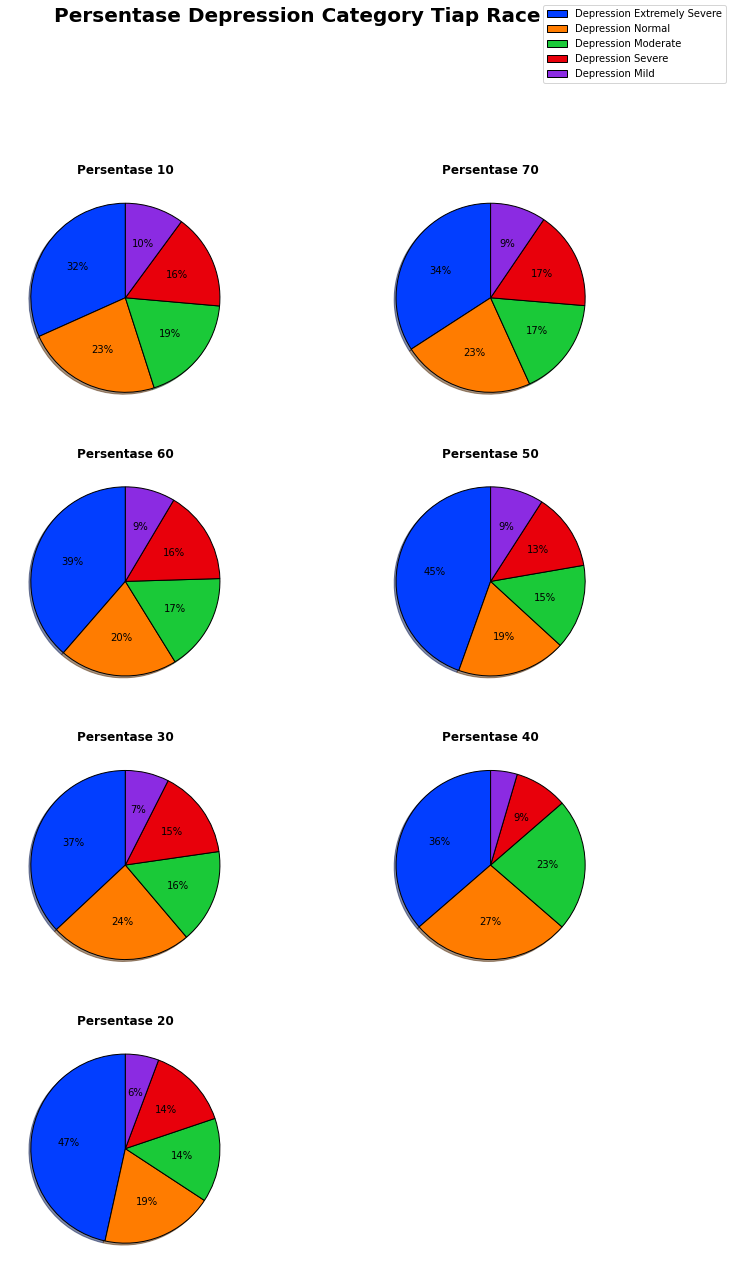

In [139]:
percentage = all_data[['race', 'Depression Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['race'].dropna().unique()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[3, 1].set_visible(False)
fig.suptitle("Persentase Depression Category Tiap Race", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

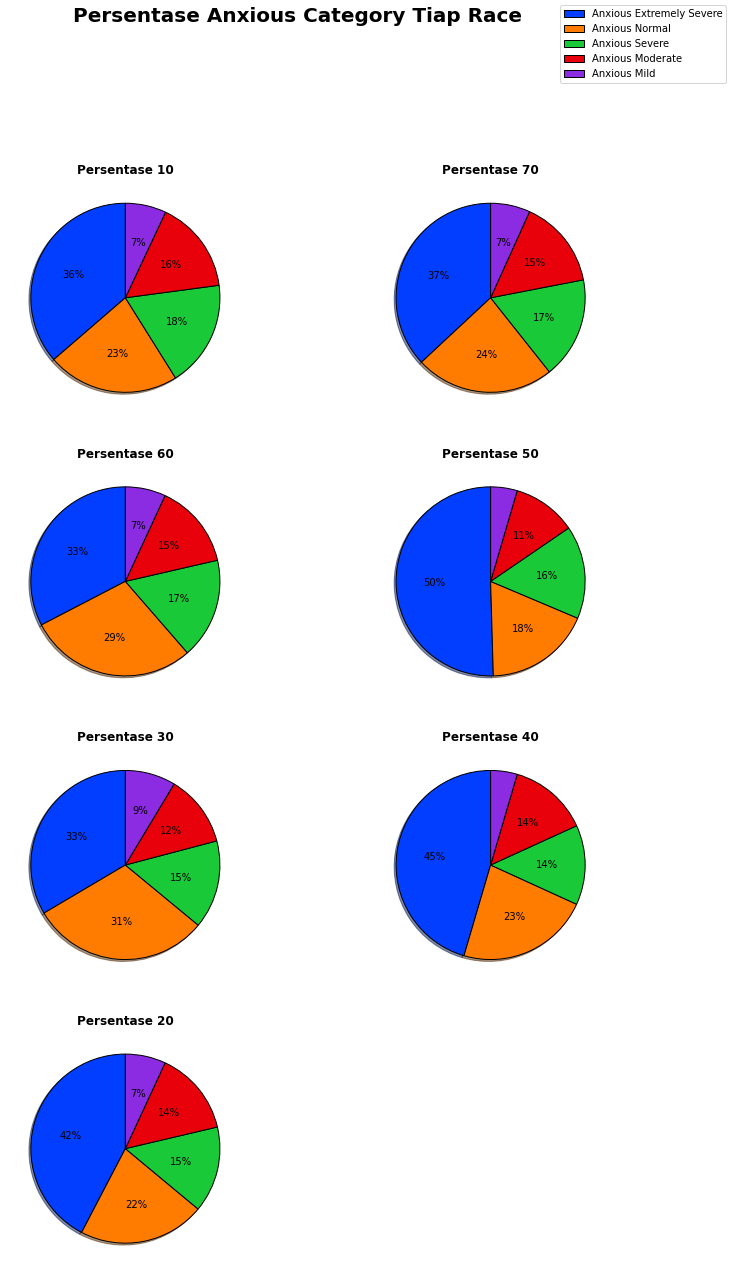

In [140]:
percentage = all_data[['race', 'Anxious Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['race'].dropna().unique()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[3, 1].set_visible(False)
fig.suptitle("Persentase Anxious Category Tiap Race", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

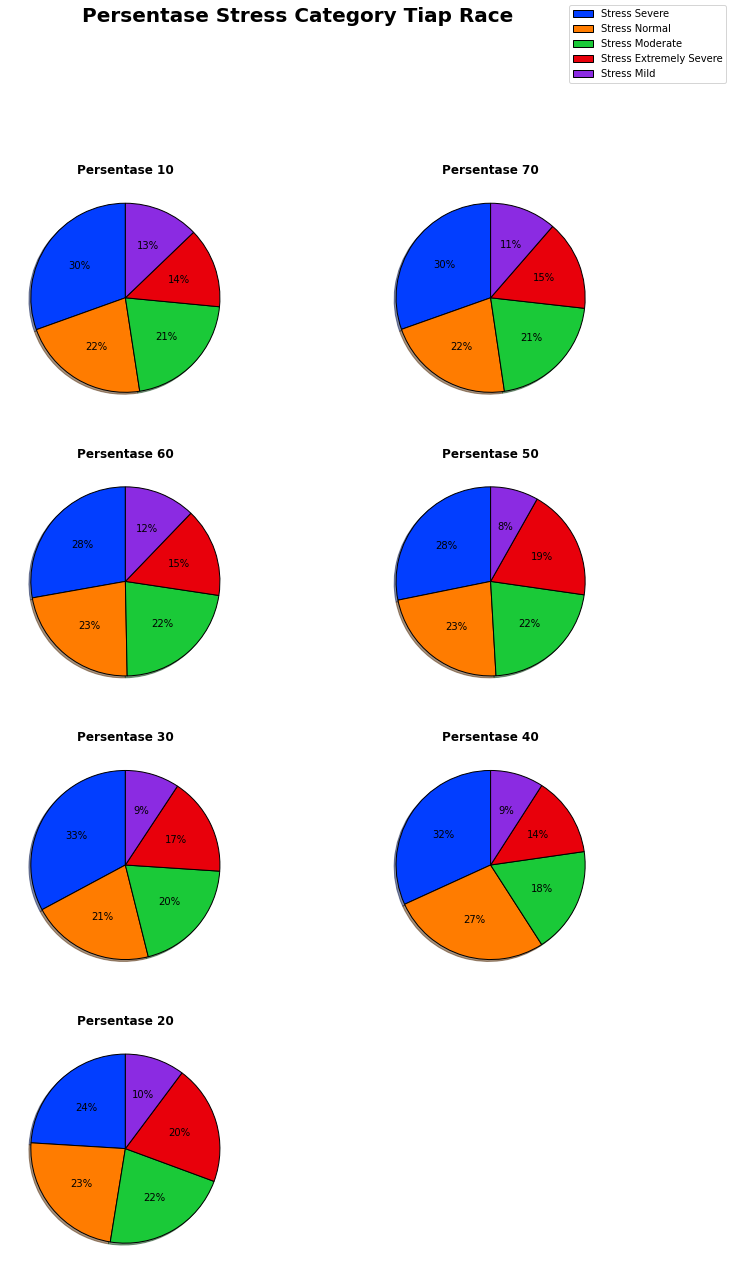

In [141]:
percentage = all_data[['race', 'Stress Category']].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

list_temp = all_data['race'].dropna().unique()

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=[12, 20])
for index, element in enumerate(list_temp):
  labels = percentage.loc[element].keys()
  ax[index//2, index%2].pie(percentage.loc[element],
              startangle=90, 
              colors=colors, 
              autopct=autopct_generator(),
              shadow=True,
              wedgeprops={'edgecolor': 'black'})
  ax[index//2, index%2].set_title(f"Persentase {element}", fontweight="bold")

ax[3, 1].set_visible(False)
fig.suptitle("Persentase Stress Category Tiap Race", 
            fontsize=20, 
            fontweight='bold', y=1)
fig.legend(labels=labels)
plt.show()

In [108]:
list_other

['hand',
 'gender',
 'age',
 'voted',
 'country',
 'religion',
 'familysize',
 'major',
 'source',
 'uniquenetworklocation',
 'education',
 'married',
 'screensize',
 'testelapse',
 'surveyelapse',
 'introelapse',
 'urban',
 'engnat',
 'race',
 'orientation']

In [53]:
def concat_TIPI_VCL(df):
  index = df.index
  return pd.concat([df, data[list_TIPI].iloc[index], data[list_VCL].iloc[index]], axis=1)

In [54]:
train_dep = concat_TIPI_VCL(train_dep)
train_anx = concat_TIPI_VCL(train_anx)
train_str = concat_TIPI_VCL(train_str)

In [55]:
train_dep["Category"].value_counts()

Depression Moderate            3246
Depression Extremely Severe    2740
Depression Normal              2660
Depression Severe              2537
Depression Mild                1704
Name: Category, dtype: int64

In [56]:
train_anx["Category"]

3                  Anxious Severe
5                  Anxious Normal
6                  Anxious Severe
7                  Anxious Normal
13                 Anxious Severe
                   ...           
39762            Anxious Moderate
39767    Anxious Extremely Severe
39771    Anxious Extremely Severe
39772              Anxious Normal
39774            Anxious Moderate
Name: Category, Length: 13405, dtype: object

In [57]:
import joblib
joblib.dump(pd.DataFrame(train_dep["Category"].value_counts()), "value_counts_dep.pkl")
joblib.dump(pd.DataFrame(train_anx["Category"].value_counts()), "value_counts_anx.pkl")
joblib.dump(pd.DataFrame(train_str["Category"].value_counts()), "value_counts_str.pkl")

['value_counts_str.pkl']

In [58]:
train_anx["Category"].value_counts()

Anxious Extremely Severe    4206
Anxious Moderate            3032
Anxious Severe              2644
Anxious Normal              2449
Anxious Mild                1074
Name: Category, dtype: int64

In [59]:
train_str["Category"].value_counts()

Stress Normal              5351
Stress Moderate            4469
Stress Severe              3604
Stress Mild                2665
Stress Extremely Severe    1323
Name: Category, dtype: int64

In [60]:
# Model selection & metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Machine Learning Model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

In [61]:
def write_logs(path, data):
  assert type(data) == dict
  fieldnames = data.keys()
  with open(path, mode="a") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    if csv_file.tell() == 0:
      writer.writeheader()
    writer.writerow(data)

In [62]:
models = {
  "KNeighborsClassifier": KNeighborsClassifier(),
  "MultinomialNB": MultinomialNB(),
  "Decision_Tree": DecisionTreeClassifier(),
  "RandomForest": RandomForestClassifier(),
  "GradientBoosting": GradientBoostingClassifier(),
  "XGBoost": XGBClassifier()
}

params = {
  "KNeighborsClassifier": {
    "n_neighbors": np.arange(30, 50),
  },
  "MultinomialNB": {
      "alpha": np.arange(1, 6)
  },
  "Decision_Tree": {
    "criterion": ['gini'],
    "max_depth": [4]
  },
  "RandomForest": {
    "n_estimators": [500],
    "max_depth": [None]    
  },
  "GradientBoosting": {
    "learning_rate": [2e-1, 5e-1, 1e-1],
    "n_estimators": np.arange(10, 50, 10)
  },
  "XGBoost":{
    "n_estimators": [5, 10],
  },
}

In [63]:
def grid_search_kfold(X_train, y_train, X_test, y_test,
                      note, logs_path="./logs.csv", 
                      models=models, params=params):
  print("| {:28} | {} | {} | {:48} |".format("Classifier", "Training Accuracy", "Test Accuracy", "Best Parameter"))
  print("| {} | {} | {} | {} |".format("-"*28, "-"*17, "-"*13, "-"*48))

  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  logs = {}
  for classification in models.keys():
    clf = GridSearchCV(models[classification], params[classification], cv=skf, scoring='accuracy')
    start_time = datetime.datetime.now().strftime("%X")
    clf.fit(X_train, y_train)
    end_time = datetime.datetime.now().strftime("%X")
    clf_name = models[classification].__class__.__name__
    best_params = str(clf.best_params_)
    train_acc = clf.best_score_
    test_acc = clf.score(X_test, y_test)
    logs["Date"] = datetime.datetime.now().strftime("%c")
    logs["Start Time"] = start_time
    logs["End Time"] = end_time
    logs["Classifier"] = clf_name
    logs["Train Accuracy"] = train_acc
    logs["Test Accuracy"] = test_acc
    logs["Params"] = best_params
    logs["Note"] = note
    logs["try_params"] = params[classification]
    write_logs(logs_path, logs)
    print("| {:28} | {:17.7f} | {:13.7f} | {:48} |".format(clf_name, train_acc, test_acc, best_params))

In [64]:
X_dep = train_dep.drop(["Category"], axis=1)
y_dep = train_dep["Category"].copy()

X_str = train_str.drop(["Category"], axis=1)
y_str = train_str["Category"].copy()

X_anx = train_anx.drop(["Category"], axis=1)
y_anx = train_anx["Category"].copy()

X_dep_train, X_dep_test, y_dep_train, y_dep_test = \
  train_test_split(X_dep, y_dep, stratify=y_dep)

X_str_train, X_str_test, y_str_train, y_str_test = \
  train_test_split(X_str, y_str, stratify=y_str)

X_anx_train, X_anx_test, y_anx_train, y_anx_test = \
  train_test_split(X_anx, y_anx, stratify=y_anx)

In [65]:
X_anx_train.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
30363,0,1,0,1,0,0,1,0,1,1,...,0,0,1,1,0,1,0,0,1,1
33710,0,0,0,3,0,1,0,0,2,0,...,0,0,1,1,0,1,1,1,1,1
10504,2,0,1,1,2,0,2,0,0,2,...,0,1,1,1,1,1,1,1,1,1
13195,0,0,0,3,0,0,0,0,0,3,...,0,1,1,1,0,1,1,1,1,1
3506,1,0,1,1,1,0,0,1,1,0,...,0,0,1,1,0,1,1,1,1,1


In [66]:
grid_search_kfold(X_anx_train, y_anx_train, X_anx_test, y_anx_test
                  ,note="Data Anxious")

| Classifier                   | Training Accuracy | Test Accuracy | Best Parameter                                   |
| ---------------------------- | ----------------- | ------------- | ------------------------------------------------ |


KeyboardInterrupt: 

In [ ]:
grid_search_kfold(X_dep_train, y_dep_train, X_dep_test, y_dep_test
                  ,note="Data Depression")

| Classifier                   | Training Accuracy | Test Accuracy | Best Parameter                                   |
| ---------------------------- | ----------------- | ------------- | ------------------------------------------------ |
| KNeighborsClassifier         |         0.7548888 |     0.7650528 | {'n_neighbors': 32}                              |
| MultinomialNB                |         0.7595447 |     0.7610180 | {'alpha': 5}                                     |
| DecisionTreeClassifier       |         0.5876875 |     0.5909373 | {'criterion': 'gini', 'max_depth': 4}            |
| RandomForestClassifier       |         0.8868081 |     0.8857852 | {'max_depth': None, 'n_estimators': 500}         |
| GradientBoostingClassifier   |         0.8893947 |     0.9096834 | {'learning_rate': 0.5, 'n_estimators': 40}       |
[20:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric u

In [ ]:
grid_search_kfold(X_str_train, y_str_train, X_str_test, y_str_test
                  ,note="Data Stress")

| Classifier                   | Training Accuracy | Test Accuracy | Best Parameter                                   |
| ---------------------------- | ----------------- | ------------- | ------------------------------------------------ |
| KNeighborsClassifier         |         0.7549583 |     0.7567195 | {'n_neighbors': 34}                              |
| MultinomialNB                |         0.7038058 |     0.7082472 | {'alpha': 1}                                     |
| DecisionTreeClassifier       |         0.5835047 |     0.5881002 | {'criterion': 'gini', 'max_depth': 4}            |
| RandomForestClassifier       |         0.8646144 |     0.8669883 | {'max_depth': None, 'n_estimators': 500}         |
| GradientBoostingClassifier   |         0.8936366 |     0.8952447 | {'learning_rate': 0.5, 'n_estimators': 40}       |
[20:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric u

In [ ]:
model_depression = GradientBoostingClassifier(**{'learning_rate': 0.5, 'n_estimators': 40})
model_depression.fit(X_dep_train, y_dep_train)
y_dep_test = model_depression.predict(X_dep_test)
accuracy_score(y_dep_test, y_dep_test)

1.0

In [ ]:
import joblib
joblib.dump(model_depression, "model_depression.pkl")

['model_depression.pkl']

In [ ]:
model_stress = GradientBoostingClassifier(**{'learning_rate': 0.5, 'n_estimators': 40})
model_stress.fit(X_str_train, y_str_train)
y_str_pred = model_stress.predict(X_str_test)
accuracy_score(y_str_test, y_str_pred)

0.8952446588559614

In [ ]:
joblib.dump(model_stress, "model_stress.pkl")

['model_stress.pkl']

In [ ]:
model_anxious = GradientBoostingClassifier(**{'learning_rate': 0.5, 'n_estimators': 40})
model_anxious.fit(X_anx_train, y_anx_train)
y_anx_pred = model_anxious.predict(X_anx_test)
accuracy_score(y_anx_pred, y_anx_test)

0.8636634844868735

In [ ]:
X_anx_test.iloc[0].to_list()

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 4,
 5,
 5,
 6,
 7,
 6,
 4,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [ ]:
X_anx_test.iloc[0]

Q2A       0
Q4A       1
Q7A       0
Q9A       0
Q15A      1
Q19A      0
Q20A      1
Q23A      0
Q25A      1
Q28A      1
Q30A      3
Q36A      0
Q40A      0
Q41A      0
TIPI1     4
TIPI2     5
TIPI3     5
TIPI4     6
TIPI5     7
TIPI6     6
TIPI7     4
TIPI8     2
TIPI9     2
TIPI10    1
VCL1      1
VCL2      1
VCL3      0
VCL4      1
VCL5      0
VCL6      1
VCL7      0
VCL8      0
VCL9      1
VCL10     1
VCL11     0
VCL12     1
VCL13     1
VCL14     1
VCL15     1
VCL16     1
Name: 1601, dtype: int64

In [ ]:
{y : x for (x,y) in zip(X_anx_test.iloc[0].to_list(), X_anx_test_columns)}

{'Q2A': 0,
 'Q4A': 1,
 'Q7A': 0,
 'Q9A': 0,
 'Q15A': 1,
 'Q19A': 0,
 'Q20A': 1,
 'Q23A': 0,
 'Q25A': 1,
 'Q28A': 1,
 'Q30A': 3,
 'Q36A': 0,
 'Q40A': 0,
 'Q41A': 0,
 'TIPI1': 4,
 'TIPI2': 5,
 'TIPI3': 5,
 'TIPI4': 6,
 'TIPI5': 7,
 'TIPI6': 6,
 'TIPI7': 4,
 'TIPI8': 2,
 'TIPI9': 2,
 'TIPI10': 1,
 'VCL1': 1,
 'VCL2': 1,
 'VCL3': 0,
 'VCL4': 1,
 'VCL5': 0,
 'VCL6': 1,
 'VCL7': 0,
 'VCL8': 0,
 'VCL9': 1,
 'VCL10': 1,
 'VCL11': 0,
 'VCL12': 1,
 'VCL13': 1,
 'VCL14': 1,
 'VCL15': 1,
 'VCL16': 1}

In [ ]:
X_str_test_columns = X_str_test.columns.to_list()
X_str_test_columns

In [ ]:
X_dep_test_columns = X_dep_test.columns.to_list()
X_dep_test_columns

['Q3A',
 'Q5A',
 'Q10A',
 'Q13A',
 'Q16A',
 'Q17A',
 'Q21A',
 'Q24A',
 'Q26A',
 'Q31A',
 'Q34A',
 'Q37A',
 'Q38A',
 'Q42A',
 'TIPI1',
 'TIPI2',
 'TIPI3',
 'TIPI4',
 'TIPI5',
 'TIPI6',
 'TIPI7',
 'TIPI8',
 'TIPI9',
 'TIPI10',
 'VCL1',
 'VCL2',
 'VCL3',
 'VCL4',
 'VCL5',
 'VCL6',
 'VCL7',
 'VCL8',
 'VCL9',
 'VCL10',
 'VCL11',
 'VCL12',
 'VCL13',
 'VCL14',
 'VCL15',
 'VCL16']

In [ ]:
X_anx_test_columns = X_anx_test.columns.to_list()
model_anxious.predict(pd.DataFrame({y : x for x,y in zip(X_anx_test.iloc[0].to_list(), X_anx_test_columns)}, index=[0]))[0]

'Anxious Normal'

In [ ]:
X_anx_test_columns

['Q2A',
 'Q4A',
 'Q7A',
 'Q9A',
 'Q15A',
 'Q19A',
 'Q20A',
 'Q23A',
 'Q25A',
 'Q28A',
 'Q30A',
 'Q36A',
 'Q40A',
 'Q41A',
 'TIPI1',
 'TIPI2',
 'TIPI3',
 'TIPI4',
 'TIPI5',
 'TIPI6',
 'TIPI7',
 'TIPI8',
 'TIPI9',
 'TIPI10',
 'VCL1',
 'VCL2',
 'VCL3',
 'VCL4',
 'VCL5',
 'VCL6',
 'VCL7',
 'VCL8',
 'VCL9',
 'VCL10',
 'VCL11',
 'VCL12',
 'VCL13',
 'VCL14',
 'VCL15',
 'VCL16']

In [ ]:
joblib.dump(model_anxious, "model_anxious.pkl")

['model_anxious.pkl']